# Bài tập : Phân tích EDA cho dữ liệu Product trong tập CSV order_products_prior.csv

## 1. Tìm 10 sản phẩm bán được nhiều nhất và vẽ biểu đồ


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

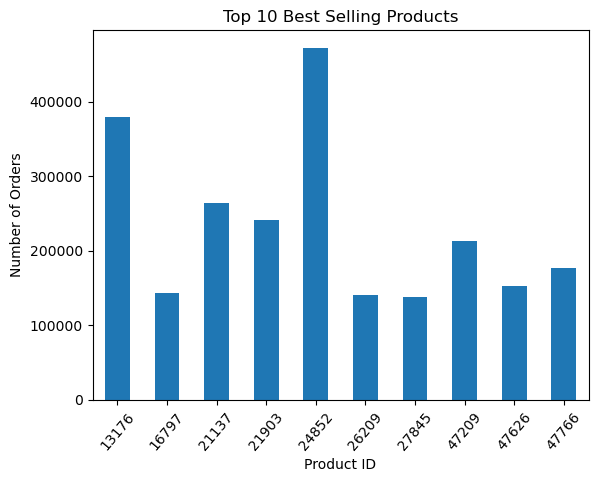

In [2]:
# Đọc dữ liệu từ tập tin "order_products__prior.csv" và lưu vào DataFrame
df = pd.read_csv("order_products__prior.csv")

# Tính tổng số lượng của mỗi sản phẩm và sắp xếp theo số lượng giảm dần
product_count = df.groupby("product_id")["product_id"].count()
sorted_counts = np.sort(product_count.values)[::-1]

# Chọn 10 sản phẩm đầu tiên và vẽ biểu đồ cột
top_products = product_count[product_count.isin(sorted_counts[:10])]
top_products.plot(kind="bar")
plt.xlabel("Product ID")
plt.xticks(rotation = 50)
plt.ylabel("Number of Orders")
plt.title("Top 10 Best Selling Products")
plt.show()



## 2. Tìm 10 sản phẩm được re-order nhiều nhất và vẽ biểu đồ


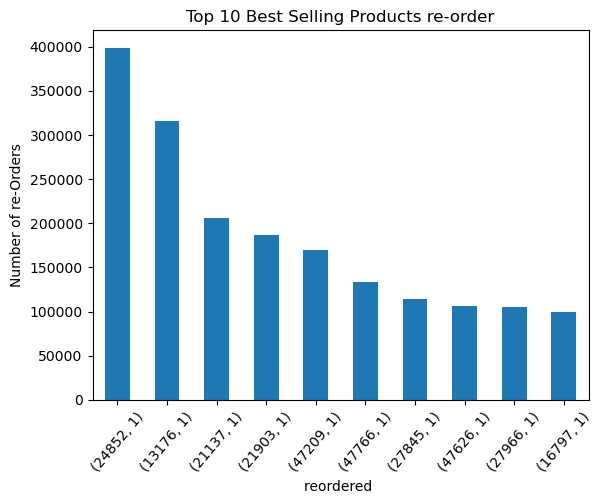

In [3]:

# Tính tổng số lượng sản phẩm được re-order

top_reorder_products = df.groupby(["product_id","reordered"])["reordered"].count().sort_values(ascending=False)[:10]

# Chọn 10 sản phẩm đầu tiên và vẽ biểu đồ cột

top_reorder_products.plot(kind="bar")
plt.xlabel("reordered ")
plt.xticks(rotation = 50)
plt.ylabel("Number of re-Orders")
plt.title("Top 10 Best Selling Products re-order")
plt.show()


## 3 Thống kê số lượng sản phẩm department và vẽ biểu đồ

In [4]:
# đọc file order_product_prior với chunk
N= 500000

order_products = pd.read_csv("order_products__prior.csv", chunksize=N, usecols=['product_id'])

chunk0 = next(order_products)



In [5]:
chunk0

,product_id
0,33120
1,28985
2,9327
3,45918
4,30035
...,...
499995,43631
499996,449
499997,27903
499998,46434


In [6]:
#Đọc file order.csv
product_info = pd.read_csv("products.csv")

product_info.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
# Chỉ lấy ra product id, department_id

product_department = product_info[['product_id','department_id']]
product_department

,product_id,department_id
0,1,19
1,2,13
2,3,7
3,4,1
4,5,13
...,...,...
49683,49684,5
49684,49685,1
49685,49686,3
49686,49687,8


In [8]:
# merge
pd.merge(chunk0, product_department, on='product_id')

,product_id,department_id
0,33120,16
1,33120,16
2,33120,16
3,33120,16
4,33120,16
...,...,...
499995,37551,13
499996,37505,7
499997,44708,16
499998,37545,17


In [9]:
# gắn kết quả và biến
ord_deparment = pd.merge(chunk0, product_department, on='product_id')['department_id']
ord_deparment


0         16
1         16
2         16
3         16
4         16
          ..
499995    13
499996     7
499997    16
499998    17
499999     7
Name: department_id, Length: 500000, dtype: int64

In [10]:
# đếm xem mỗi department_id xuất hiện bao nhiêu lần 
chunk0_department_counts = ord_deparment.value_counts().reset_index()

# Sửa lại tên cột
chunk0_department_counts = chunk0_department_counts.rename(columns={'index' : 'department_id', 'department_id': 'counts'})

chunk0_department_counts


,department_id,counts
0,4,145463
1,16,83779
2,19,44513
3,7,41613
4,1,34773
5,13,28652
6,3,18205
7,15,16370
8,20,16220
9,9,13171


In [11]:
# Viết thành hàm 
def Select_department_ID(chunk):
    ord_deparment = pd.merge(chunk, product_department, on='product_id')['department_id']
    chunk0_department_counts = ord_deparment.value_counts().reset_index()
    chunk0_department_counts.columns = ['department_id', 'counts']
    
    return chunk0_department_counts

In [12]:
# Thử lại hàm với chunk0
Select_department_ID(chunk0)

,department_id,counts
0,4,145463
1,16,83779
2,19,44513
3,7,41613
4,1,34773
5,13,28652
6,3,18205
7,15,16370
8,20,16220
9,9,13171


 ## Thử thực hiện với nhiều chunk
    


In [13]:
# Đọc lại dữ liệu
N = 5e5
order_products = pd.read_csv("order_products__prior.csv", chunksize=N, usecols=['product_id'])

In [14]:
# xử lý từng chunk và đưa vào 9danh sách kết quả
start = datetime.datetime.now()


ket_qua= []
for i, chunk in enumerate(order_products):
    department_count = Select_department_ID(chunk)
    ket_qua.append(department_count)

end = datetime.datetime.now()
print(f"Hoàn tất cho {i+1} chunk. Thời gian:", end-start)
    

Hoàn tất cho 65 chunk. Thời gian: 0:00:09.418694


In [15]:
print(ket_qua)

[    department_id  counts
0               4  145463
1              16   83779
2              19   44513
3               7   41613
4               1   34773
5              13   28652
6               3   18205
7              15   16370
8              20   16220
9               9   13171
10             17   11167
11             14   11055
12             12   10922
13             11    6935
14             18    6584
15              6    4258
16              5    2373
17              8    1692
18             21    1113
19             10     581
20              2     561,     department_id  counts
0               4  146745
1              16   83298
2              19   44717
3               7   41512
4               1   34035
5              13   28726
6               3   18150
7              15   16511
8              20   16316
9               9   13229
10             17   11465
11             12   10982
12             14   10833
13             11    6943
14             18    6535
15        

In [16]:
# keetss hợp các kết quả thành 1 dataframe

total_department_count = pd.concat(ket_qua)
print(total_department_count.shape)

(1365, 2)


In [17]:
total_department_count

,department_id,counts
0,4,145463
1,16,83779
2,19,44513
3,7,41613
4,1,34773
...,...,...
16,5,1954
17,8,1261
18,21,937
19,2,492


In [18]:
# sử dụng hàm groupby rồi tính sum
total_department_count = total_department_count.groupby('department_id').sum().reset_index()
total_department_count

,department_id,counts
0,1,2236432
1,2,36291
2,3,1176787
3,4,9479291
4,5,153696
5,6,269253
6,7,2690129
7,8,97724
8,9,866627
9,10,34573


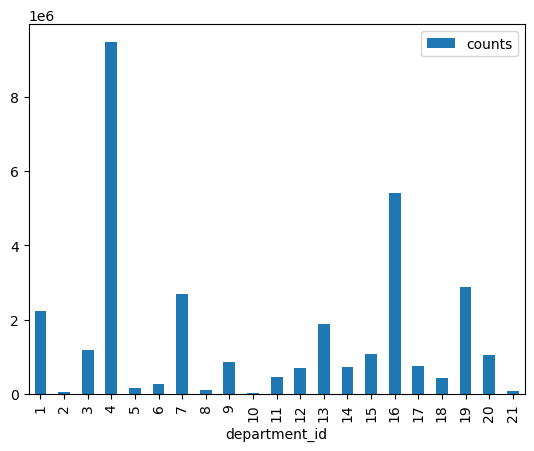

In [19]:
total_department_count.plot.bar(x='department_id', y='counts')

plt.show()
plt.close('all')

In [20]:
# lấy tên tương ứng
department_info = pd.read_csv('departments.csv')

# Thực hiện merge kết quả
name_department = pd.merge(total_department_count, department_info, on ='department_id' )
name_department


,department_id,counts,department
0,1,2236432,frozen
1,2,36291,other
2,3,1176787,bakery
3,4,9479291,produce
4,5,153696,alcohol
5,6,269253,international
6,7,2690129,beverages
7,8,97724,pets
8,9,866627,dry goods pasta
9,10,34573,bulk


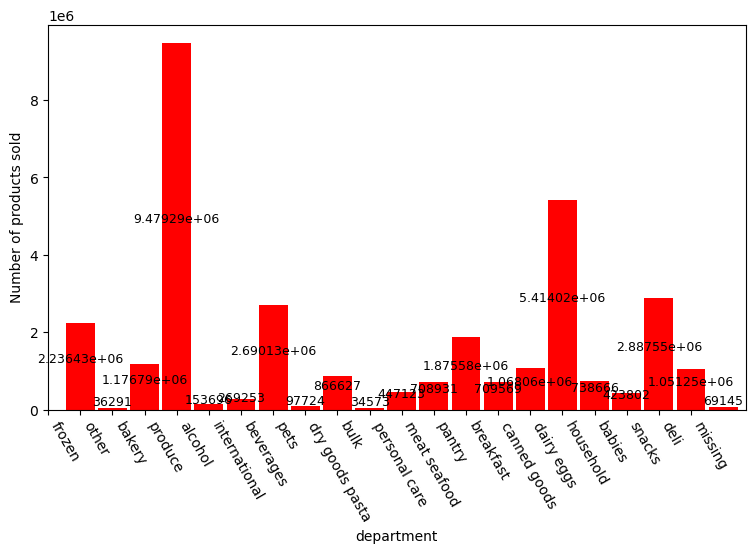

In [21]:
# Vẽ lại biểu đồ 
ax = name_department.plot.bar(x='department', y='counts', width = 0.9, figsize=(9,5), color='red', legend = None, rot = -60)

ax.bar_label(container=ax.containers[0], label_type='center', fontsize=9, padding=5)
ax.set_xticks(name_department.index-1)
ax.set_xticklabels(name_department['department'], ha='left')
ax.set_ylabel('Number of products sold')


plt.show()
plt.close('all')

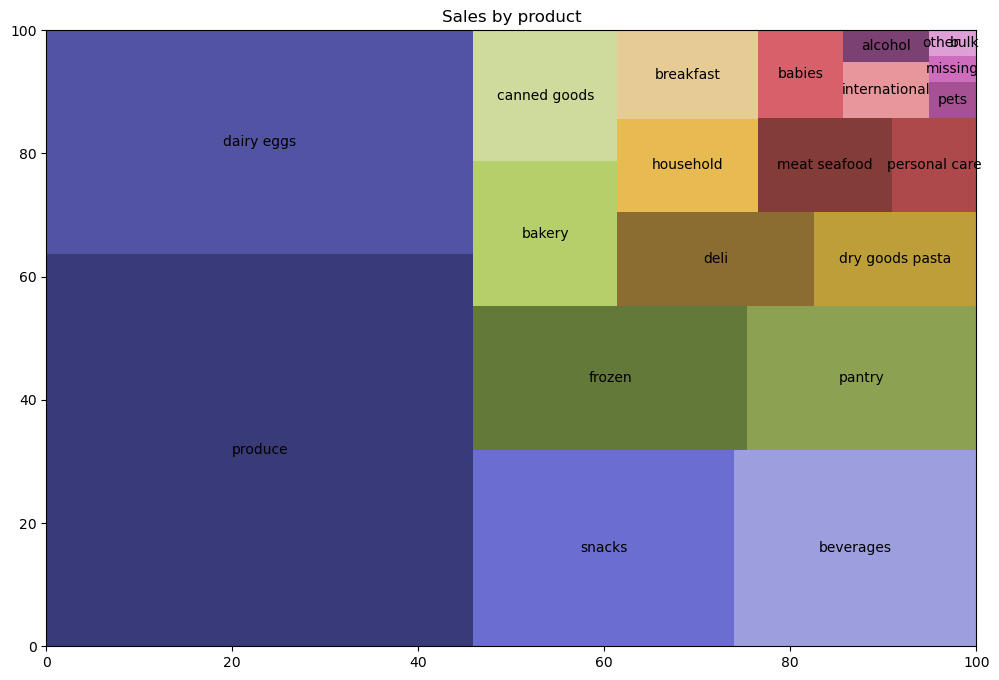

In [29]:
import squarify
import matplotlib.cm as cm

# Lấy màu cho từng sản phẩm
colors = cm.tab20b(np.linspace(0, 1, len(name_department)))

# Sắp xếp lại dataframe theo cột counts_percent
name_department_sorted = name_department.sort_values('counts', ascending=False)

# Vẽ biểu đồ treemap
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=name_department_sorted['counts'],
              label=name_department_sorted['department'], color=colors, ax=ax)

ax.set_title('Sales by product')
plt.show()